



The Plots pgfplotsx-backend
=====


## Why?

- Missing features
- (Hopefully) easier to maintain


## What's new?


### 3D contours

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


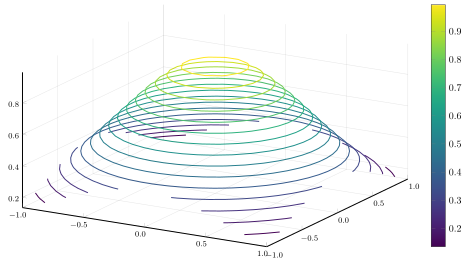

In [1]:
using Plots;
pgfplotsx();
f(x, y) = exp(-x^2 - y^2)
xs = range(-1, 1, length = 20)
ys = range(-1, 1, length = 20)
contour3d(xs, ys, [f(x, y) for x in xs, y in ys])


### Heatmaps

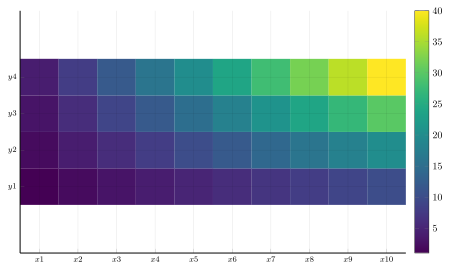

In [2]:
xs = [string("x", i) for i = 1:10]
ys = [string("y", i) for i = 1:4]
z = float((1:4) * reshape(1:10, 1, :))
pgfx_plot = heatmap(xs, ys, z, aspect_ratio = 1)


### 3D scatter

┌ Warning: blues is found in more than one library: Plots, colorcet. Choosing Plots
└ @ PlotUtils /Users/christ/.julia/packages/PlotUtils/6AioP/src/color_gradients.jl:40


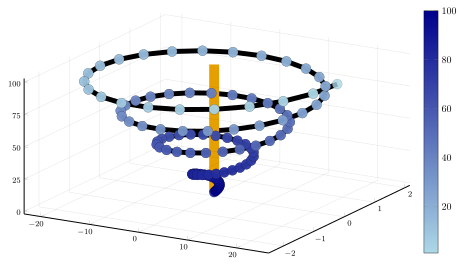

In [3]:
n = 100
ts = range(0, stop = 8π, length = n)
x = ts .* map(cos, ts)
y = (0.1ts) .* map(sin, ts)
z = 1:n
pl = plot(
        x,
        y,
        z,
        zcolor = reverse(z),
        m = (10, 0.8, :blues, Plots.stroke(0)),
        leg = false,
        cbar = true,
        w = 5,
)
pgfx_plot = plot!(pl, zeros(n), zeros(n), 1:n, w = 10)


### Surface plots

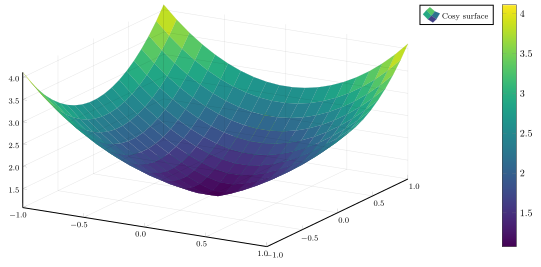

In [4]:
f(x, y) = exp(sqrt(x^2 + y^2))
xs = range(-1, 1, length = 20)
ys = range(-1, 1, length = 20)
surface(xs, ys, [f(x, y) for x in xs, y in ys], label = "Cosy surface")


### Quiver plots

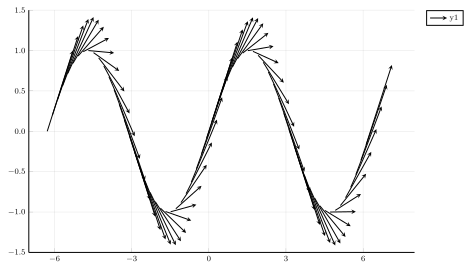

In [5]:
x = (-2pi):0.2:(2 * pi)
y = sin.(x)
u = ones(length(x))
v = cos.(x)
plot(x, y, quiver = (u, v), arrow = true, xlims = (-7, 8), ylims = (-1.5, 1.5))


### Ribbons

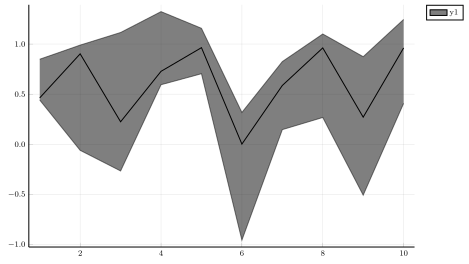

In [6]:
aa = rand(10)
bb = rand(10)
cc = rand(10)
plot(collect(1:10), cc, ribbon = (bb, aa))


### Fill between functions

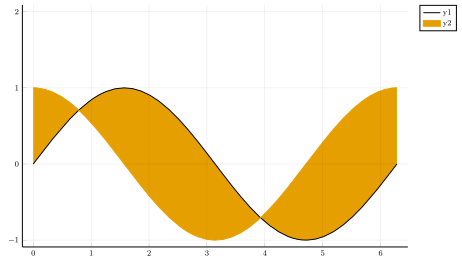

In [7]:
plot(sin, 0, 2pi)
plot!(cos, 0, 2pi, fillrange = (2, 1)) # numbers are the series indices


## What's missing?

- Layouting is a mess (especially setting margins)
- [Meta-Issue](https://github.com/JuliaPlots/Plots.jl/issues/2290)


### Layouting

- On the plots side, we have (right/left/top/bottom) margins, bounding box of the plotarea and boinding box of a subplot.
- On the pgfplots side, we have (right-left/top-bottom) margins (inner and outer), height and width of the axis as well as x/y-shift.
- ⇢ No 1:1 mapping
- In addition to that pgfplots have a page (which is currently a4paper by default).


## Lessons learned

- translate first and "improve" afterwards
- might make sense to directly target pgf/TikZ if used as backend


Pgfplots is a convenience layer over pgf/TikZ. Targeting it for wrapper packages like PGFPlots/X.jl is a good thing.
As a backend you don't really need the convenience, because that is already built in the frontend, you are more looking for fine grained control.
Therefore, if I were to write a LaTeX Makie-backend it would be called `PGFMakie.jl`. ;)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*